___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Random Forest - Classification

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [79]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Train | Test Split

In [87]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Random Forest Classification

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [98]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [99]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [100]:
preds = model.predict(X_test)

## Evaluation

In [101]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [102]:
confusion_matrix(y_test,preds)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

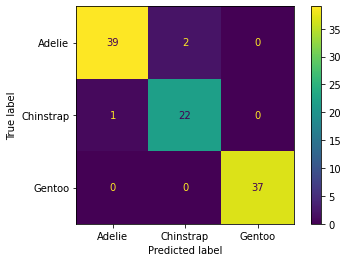

In [103]:
plot_confusion_matrix(model,X_test,y_test)

## Feature Importance

Very useful attribute of the trained model!

In [52]:
model.feature_importances_

array([0.35324545, 0.13320651, 0.1985798 , 0.12074795, 0.14244127,
       0.03781403, 0.00677831, 0.00718669])

## Choosing correct number of trees

Let's explore if continually adding more trees improves performance...

In [53]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

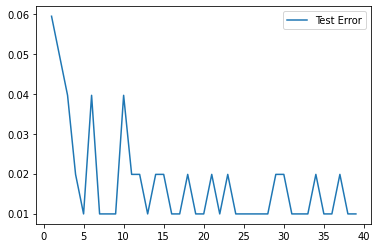

In [54]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

Clearly there are diminishing returns, on such a small dataset, we've pretty much extracted all the information we can after about 5 trees.

# Random Forest - HyperParameter Exploration

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [55]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [56]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


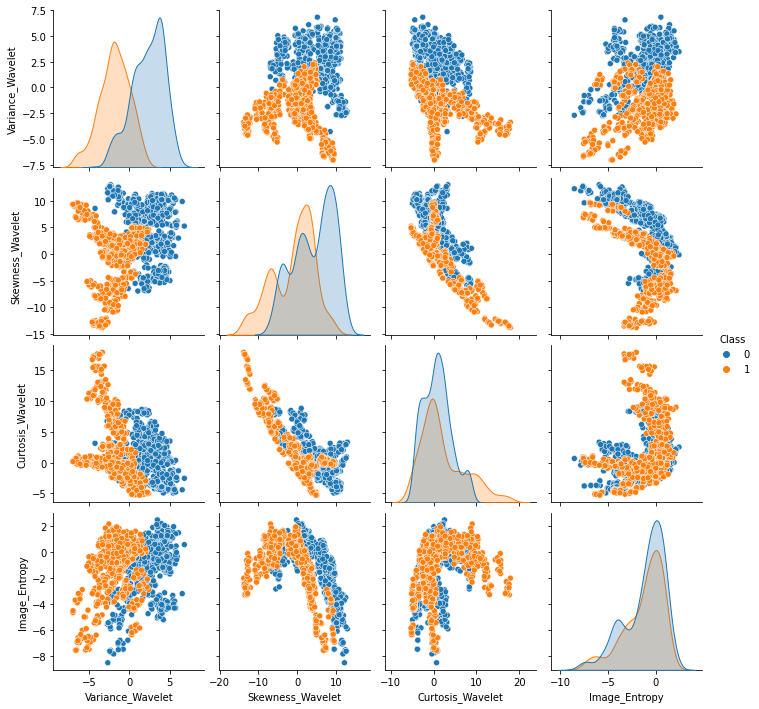

In [57]:
sns.pairplot(df,hue='Class')

In [58]:
X = df.drop("Class",axis=1)

In [59]:
y = df["Class"]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [64]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [65]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [66]:
grid.fit(X_train,y_train)

c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

GridSearchCV(estimator=RandomForestClassifier(oob_score=True),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]})

In [67]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [68]:
predictions = grid.predict(X_test)

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



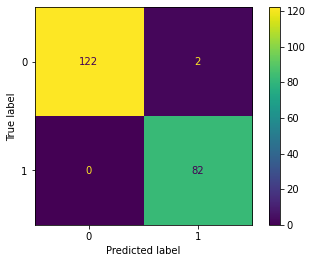

In [70]:
plot_confusion_matrix(grid,X_test,y_test)

In [71]:
# No underscore, reports back original oob_score parameter
grid.best_estimator_.oob_score

True

In [72]:
# With underscore, reports back fitted attribute of oob_score
grid.best_estimator_.oob_score_

0.9939965694682675

## Understanding Number of Estimators (Trees)

Let's plot out error vs. Number of Estimators

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

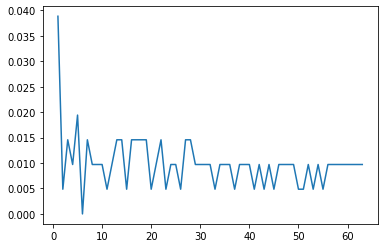

In [75]:
plt.plot(range(1,64),errors)

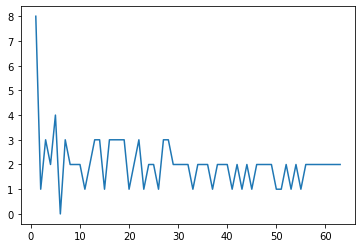

In [76]:
plt.plot(range(1,64),misclassifications)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [3]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Train | Test Split

In [4]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc=RandomForestClassifier(n_estimators=20, max_features="auto", random_state=101)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=101)

In [22]:
pre=rfc.predict(X_test)

In [23]:
rfc.feature_importances_

array([0.30333709, 0.12038674, 0.23566816, 0.17727339, 0.11919324,
       0.02971842, 0.01147564, 0.0029473 ])

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

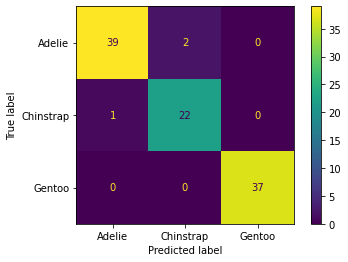

In [25]:
ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)

In [26]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [27]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


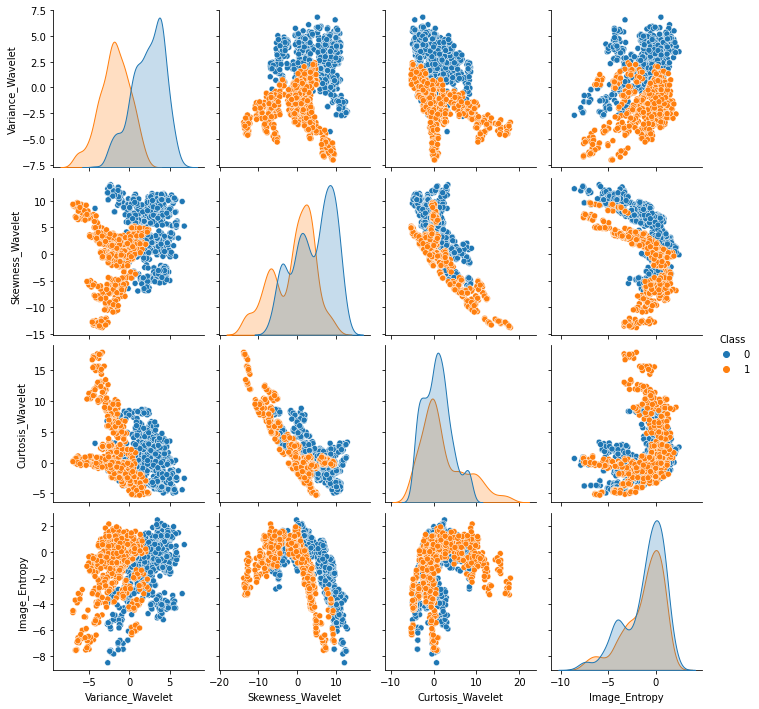

In [28]:
sns.pairplot(df,hue='Class')

In [29]:
X = df.drop("Class",axis=1)

In [30]:
y = df["Class"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc=RandomForestClassifier()

In [38]:
n_estimators=[64,100,125,200]
max_features=[2,3,4]
bootstrap=[True,False]
oob_score=[True,False]
p_g={"n_estimators":n_estimators, "max_features":max_features,"bootstrap":bootstrap,"oob_score":oob_score }

In [39]:
grid_model=GridSearchCV(rfc,p_g)

In [40]:
grid_model.fit(X_train,y_train)

/Users/dipenthapa/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dipenthapa/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dipenthapa/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.wa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 125, 200],
                         'oob_score': [True, False]})

In [41]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [43]:
grid_model.best_score_
# gives oob score

0.9948571218957486

In [44]:
rfc=RandomForestClassifier(n_estimators=64, max_features=2,bootstrap=True,oob_score=True)

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [46]:
rfc.base_estimator_

DecisionTreeClassifier()

In [47]:
rfc.feature_importances_

array([0.54843007, 0.23033004, 0.16908455, 0.05215534])

In [48]:
pre=rfc.predict(X_test)

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [50]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



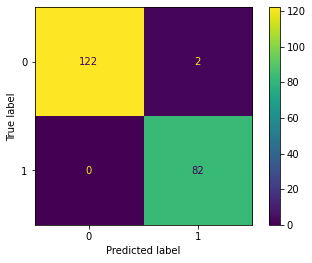

In [51]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test,y_test)

In [54]:
err=[]
misclassified=[]
for n in range(1,200):
    rfc=RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    pre=rfc.predict(X_test)
    error=1-accuracy_score(y_test,pre)
    missed=np.sum(y_test!=pre)
    misclassified.append(missed)
    err.append(error)

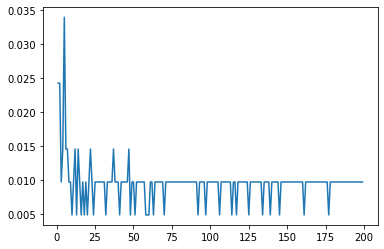

In [55]:
plt.plot(range(1,200),err)

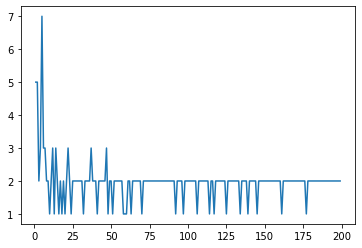

In [56]:
plt.plot(range(1,200),misclassified)